In [1]:
import sys
sys.path.append("estimators")
sys.path.append("simulations")

In [2]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
from estimators_RKHS import *

In [4]:
from generation import *

In [ ]:
def function_gamma(gamma):
    mod = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': gamma})

    mod.estimate_pi_ipr()
    mod.compute_K2()
    mod.compute_tau_plug_in()
    mod.estimate_variance_plug_in()

    return mod.var_plug_in_n

In [6]:
var_seq = np.zeros(100)
gamma_seq = np.zeros(100)
var_seq_gamma_p = np.zeros(100)

In [7]:
for i in range(100):
    p_source_plus, p_source_minus, p_target  = generate_sample_Nstd_Nstd_CC(p=5, beta=1, n_plus=150, n_minus=150, n_target=300,
                             pi_target=0.75, seed=i)
    res = minimize(function_gamma, x0=1/5)
    var_seq[i] = res['fun']
    gamma_seq[i] = res['x'][0]

    var_seq_gamma_p[i] = function_gamma(1/5)

In [8]:
p_source_plus, p_source_minus, p_target  = generate_sample_Nstd_Nstd_CC(p=5, beta=1, n_plus=150, n_minus=150, n_target=300,
                             pi_target=0.75, seed=123)

In [9]:
gamma_seq_try = np.linspace(0.001,0.2001, 100)
var_seq_try = [function_gamma(i) for i in gamma_seq_try]

In [10]:
res = minimize(function_gamma, x0=1/5)

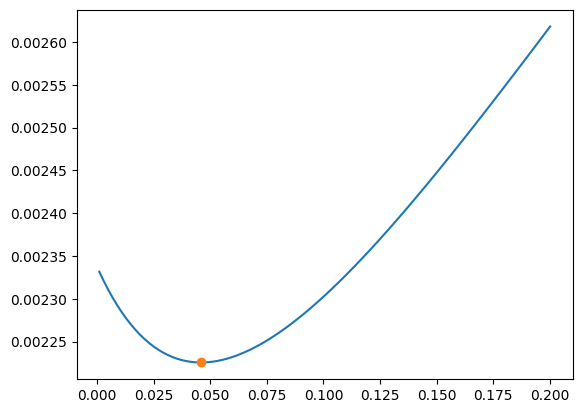

In [11]:
plt.plot(gamma_seq_try, var_seq_try)
plt.plot(res['x'][0], res['fun'], 'o')

In [68]:
def function_gamma2(gamma):
    return generate_sample_Nstd_Nstd_CC_rbf(p=5, beta=1, n_plus=150, n_minus=150, n_target=500,
                             pi_target=0.25, gamma=gamma)[0]

In [69]:
res = minimize(function_gamma2, x0=1/5, bounds=[(0,1)])

In [70]:
res['x']

array([0.06910939])

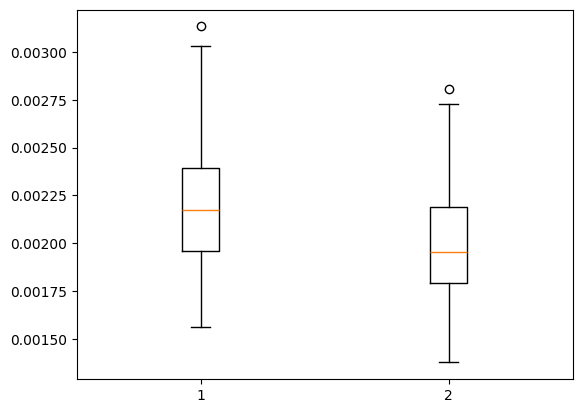

In [14]:
plt.boxplot([var_seq_gamma_p, var_seq])
plt.show()

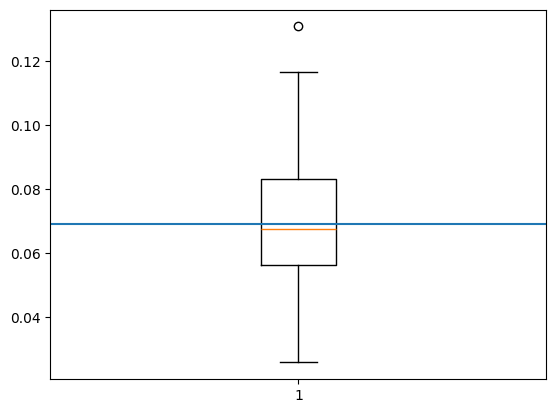

In [15]:
plt.boxplot(gamma_seq)
plt.hlines(res['x'], 0.5, 1.5)
plt.show()

In [16]:
from scipy.spatial.distance import pdist, cdist

In [17]:
p_target.shape

(300, 5)

In [18]:
np.vstack((p_source_plus, p_source_minus))

array([[-0.57860025,  1.65143654, -2.42667924, -0.42891263,  1.26593626],
       [-0.8667404 , -0.67888615, -0.09470897,  1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128,  2.20593008,  2.18678609,  1.0040539 ],
       ...,
       [ 1.52160637,  2.10373256,  0.95073761,  1.48809507,  2.66929319],
       [ 1.04537318,  1.64633754,  2.18545833, -1.19439646,  0.55101359],
       [ 1.64517955,  1.89841867,  3.16103313,  0.74391801,  1.82866301]],
      shape=(300, 5))

In [19]:
p_source = np.vstack((p_source_plus, p_source_minus))

In [20]:
d = cdist(p_source, p_source)**2

In [21]:
d2 = pdist(p_source)**2


In [22]:
300*299/2

44850.0

In [23]:
d2

array([18.26748347, 32.74016421, 17.37753304, ..., 13.64341278,
        6.20328901,  6.76450977], shape=(44850,))

In [24]:
d_no_diag = d[np.triu_indices_from(d, k=1)]

In [25]:
np.quantile(1/d_no_diag, 0.01)

np.float64(0.025550565119049483)

In [26]:
np.quantile(1/d_no_diag, 0.99)

np.float64(0.7213878990792902)

In [27]:
np.quantile(1/d_no_diag, np.array([0.01,0.015,0.02,0.025,0.05,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99]))

array([0.02555057, 0.02761064, 0.02916034, 0.03054954, 0.03575992,
       0.04293264, 0.05469227, 0.06029133, 0.09160147, 0.14847847,
       0.24473548, 0.34751163, 0.7213879 ])

In [28]:
res['x']

array([0.06910944])

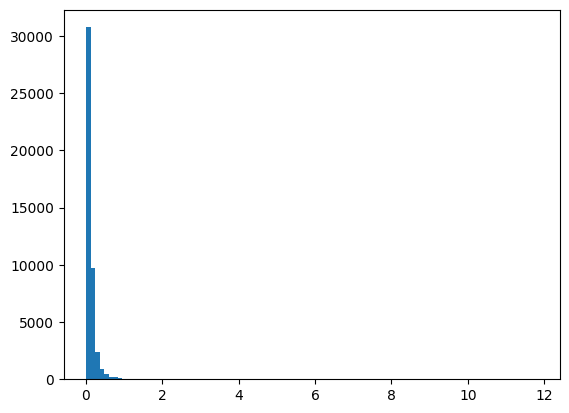

In [29]:
plt.hist(1/d_no_diag, bins=100)
plt.show()

In [30]:
np.sum((p_target[0,:] - p_target[1,:])**2)

np.float64(10.21562635169691)

In [31]:
function_gamma(1/5)

np.float64(0.002617724409630381)

In [32]:
res = minimize(function_gamma, x0=1/5)

In [33]:
res['fun']

np.float64(0.0022254945621716375)

In [34]:
res['x'][0]

np.float64(0.04587177091166653)

In [35]:
p_source_plus, p_source_minus, p_target  = generate_sample_Nstd_Nstd_CC(p=5, beta=1, n_plus=150, n_minus=150, n_target=300,
                             pi_target=0.75, seed=123)

In [36]:
mod = estimator_RHKS_rbf_gamma(p_target, p_source_plus, p_source_minus)

In [37]:
mod.compute_basic_simulations()

In [38]:
mod.var_plug_in_n

np.float64(0.0022254945621716375)

In [39]:
mod = estimator_RHKS_rbf_gamma(p_target, p_source_plus, p_source_minus, 'grid')

In [40]:
mod.compute_basic_simulations()

In [41]:
mod.var_plug_in_n

np.float64(0.0022258315970573373)